# Assignment_1_AI_Platform

###### build a computational graph that follows this general structure:

###### input (x)
######    │
######    ├──> Layer 1 (3 neurons: w00,b00 / w01,b01 / w02,b02)
######    │        ↓ Activation: ReLU
######    │
######    ├──> Layer 2 (2 neurons: w10,b10 / w11,b11)
######    │        ↓ Activation: Sigmoid
######    │
######    ├──> Combine the two outputs (+)
######    │        ↓ Activation: Tanh
######    │
######    └──> Output layer (1 neuron: w20,b20)
######             ↓ Activation: None (linear output)

###### Build the entire computational graph manually using PyTorch tensors. Create all weights and biases as tensors with requires_grad=True. Apply ###### mathematical operations manually (for example, y = torch.relu(w * x + b)).
######  Your graph should include at least three activation functions: ReLU, Sigmoid, and Tanh. Perform a complete forward pass step by step, showing ###### intermediate results and printing them. After computing the final output, 
###### use output.backward() to calculate the gradient of the output with respect to the input and print it. 
###### ============
###### Deadline & Submission Instructions:
###### The assignment must be submitted by Thursday, October 9th, at 11:59 PM.
###### For submission, please upload your code to GitHub and then submit your repository URL using the following form:
###### https://forms.gle/mnJLtHyiRNGqfTp59

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class assignment_model(nn.Module):

    def __init__ (self):

        super().__init__()


        self.w00 = nn.Parameter(torch.tensor(0.7) , requires_grad=True)
        self.b00 = nn.Parameter(torch.tensor(0.5) , requires_grad=True)

        self.w01 = nn.Parameter(torch.tensor(0.8) , requires_grad=True)
        self.b01 = nn.Parameter(torch.tensor(0.5) , requires_grad=True)

        self.w02 = nn.Parameter(torch.tensor(0.6) , requires_grad=True)
        self.b02 = nn.Parameter(torch.tensor(0.5) , requires_grad=True)

        self.w10 = nn.Parameter(torch.tensor(0.9) , requires_grad=True)
        self.b10 = nn.Parameter(torch.tensor(0.7) , requires_grad=True)

        self.w11 = nn.Parameter(torch.tensor(0.9) , requires_grad=True)
        self.b11 = nn.Parameter(torch.tensor(0.7) , requires_grad=True)

        self.w20 = nn.Parameter(torch.tensor(0.9) , requires_grad=True)
        self.b20 = nn.Parameter(torch.tensor(0.7) , requires_grad=True)

    def forward (self , input):
      
        input_to_layer_00 = input * self.w00 + self.b00
        layer_00_output = F.relu(input_to_layer_00)
        
        input_to_layer_01 = input * self.w01 + self.b01
        layer_01_output = F.relu(input_to_layer_01)
        
        input_to_layer_02 = input * self.w02 + self.b02
        layer_02_output = F.relu(input_to_layer_02)

        output_0 = layer_00_output+layer_01_output+layer_02_output

        input_to_layer_10 = output_0 * self.w10 + self.b10
        layer_10_output = F.sigmoid(input_to_layer_10)

        input_to_layer_11 = output_0 * self.w11 + self.b11
        layer_11_output = F.sigmoid(input_to_layer_11)

        output_1 = layer_10_output+layer_11_output
        output_1 = F.tanh(output_1)


        input_to_layer_20 = output_1 * self.w20 + self.b20

        return input_to_layer_20

In [3]:
assignment_model_1 = assignment_model()

In [36]:
x_train = torch.linspace(1, 2.5, 40)

y_train = torch.tensor([
    1.5600, 1.5651, 1.5695, 1.5732, 1.5764, 1.5791, 1.5814, 1.5834, 1.5851,
    1.5866, 1.5879, 1.5890, 1.5900, 1.5908, 1.5915, 1.5921, 1.5926, 1.5930,
    1.5934, 1.5937, 1.5939, 1.5941, 1.5943, 1.5944, 1.5945, 1.5946, 1.5947,
    1.5948, 1.5949, 1.5950, 1.5950, 1.5951, 1.5951, 1.5952, 1.5952, 1.5953,
    1.5953, 1.5953, 1.5953, 1.5954
])

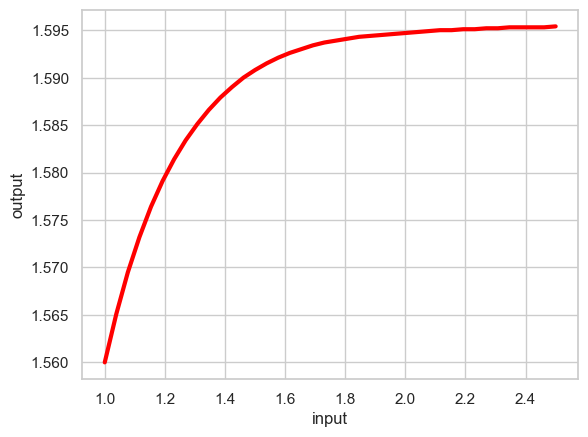

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

sns.lineplot(
    x=x_train,
    y=y_train,
    color='red',
    linewidth=3
)

plt.ylabel('output')
plt.xlabel('input')
plt.show()


In [38]:
pred_outputs  = assignment_model_1(x_train)
pred_outputs 

tensor([1.5782, 1.5784, 1.5786, 1.5788, 1.5790, 1.5792, 1.5793, 1.5795, 1.5796,
        1.5797, 1.5798, 1.5799, 1.5800, 1.5801, 1.5802, 1.5803, 1.5804, 1.5804,
        1.5805, 1.5806, 1.5806, 1.5807, 1.5807, 1.5808, 1.5808, 1.5808, 1.5809,
        1.5809, 1.5809, 1.5810, 1.5810, 1.5810, 1.5811, 1.5811, 1.5811, 1.5811,
        1.5811, 1.5812, 1.5812, 1.5812], grad_fn=<AddBackward0>)

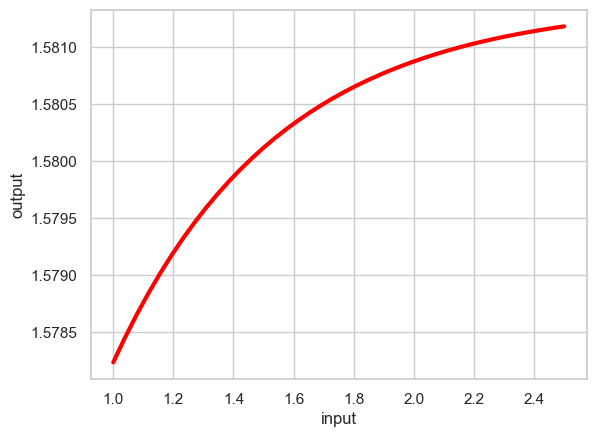

In [39]:
sns.set(style="whitegrid")

sns.lineplot(
    x=x_train,
    y=pred_outputs.detach(),
    color='red',
    linewidth=3
)

plt.ylabel('output')
plt.xlabel('input')
plt.show()

In [40]:
optimizer = SGD(assignment_model_1.parameters(), lr=0.01)
loss = nn.MSELoss()

In [41]:
for epoch in range(500):
    total_loss = 0

    for i in range(len(x_train)):
        input_i = x_train[i]
        true_output_i = y_train[i]
        pred_output_i = assignment_model_1(input_i)
        loss_value = loss(pred_output_i, true_output_i)
        loss_value.backward()
        total_loss += loss_value

    print("Epoch:", epoch, " | Total Loss:", total_loss)

    optimizer.step()
    optimizer.zero_grad()

Epoch: 0  | Total Loss: tensor(0.0059, grad_fn=<AddBackward0>)
Epoch: 1  | Total Loss: tensor(0.0036, grad_fn=<AddBackward0>)
Epoch: 2  | Total Loss: tensor(0.0029, grad_fn=<AddBackward0>)
Epoch: 3  | Total Loss: tensor(0.0027, grad_fn=<AddBackward0>)
Epoch: 4  | Total Loss: tensor(0.0027, grad_fn=<AddBackward0>)
Epoch: 5  | Total Loss: tensor(0.0027, grad_fn=<AddBackward0>)
Epoch: 6  | Total Loss: tensor(0.0026, grad_fn=<AddBackward0>)
Epoch: 7  | Total Loss: tensor(0.0026, grad_fn=<AddBackward0>)
Epoch: 8  | Total Loss: tensor(0.0026, grad_fn=<AddBackward0>)
Epoch: 9  | Total Loss: tensor(0.0026, grad_fn=<AddBackward0>)
Epoch: 10  | Total Loss: tensor(0.0026, grad_fn=<AddBackward0>)
Epoch: 11  | Total Loss: tensor(0.0026, grad_fn=<AddBackward0>)
Epoch: 12  | Total Loss: tensor(0.0026, grad_fn=<AddBackward0>)
Epoch: 13  | Total Loss: tensor(0.0026, grad_fn=<AddBackward0>)
Epoch: 14  | Total Loss: tensor(0.0026, grad_fn=<AddBackward0>)
Epoch: 15  | Total Loss: tensor(0.0026, grad_fn=<A